# FIFA 22 Ultimate Team Visuals

In [1]:
# imports
import altair as alt
import pandas as pd
from sklearn.model_selection import train_test_split

# altair specific
alt.data_transformers.disable_max_rows()
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [2]:
# read the data
data_path = "data/player_raw_data.csv"
fifa = pd.read_csv(data_path)
# print first 6 rows
fifa.head()

,name,first_name,last_name,country,age,overall,potential,club,best_position,value,...,vision,penalties,composure,defensive_awareness,standing_tackle,sliding_tackle,diving,handling,kicking,reflexes
0,Patrick Vroegh,Patrick,Vroegh,Netherlands,21,64,73,Vitesse,CM,1300000,...,63,44,64,55,61,55,10,7,5,11
1,Adam Senior,Adam,Senior,England,19,57,67,Bolton Wanderers,CB,325000,...,34,32,57,53,56,55,9,13,14,7
2,Finlay Lockett,Finlay,Lockett,England,18,54,68,Bolton Wanderers,LW,250000,...,48,49,50,27,29,35,9,6,12,6
3,Sergio Lozano Lluch,Sergio,Lluch,Spain,22,62,71,Villarreal CF,CAM,900000,...,64,56,60,54,59,52,10,7,12,10
4,Sam Sanna,Sam,Sanna,France,22,61,70,Toulouse Football Club,RB,700000,...,63,57,64,63,65,66,6,6,6,10


In [3]:
# retunrs the data size
print(f"\nThe data is of size {fifa.shape}")

# get all column names to see what attributes exists for usage
fifa.columns


The data is of size (12045, 51)


Index(['name', 'first_name', 'last_name', 'country', 'age', 'overall',
       'potential', 'club', 'best_position', 'value', 'wage', 'total_stats',
       'preferred_foot', 'weak_foot', 'skill_move', 'work_rate', 'height',
       'weight', 'crossing', 'finishing', 'heading_accuracy', 'short_passing',
       'volleys', 'dribbling', 'curve', 'fk_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'defensive_awareness', 'standing_tackle', 'sliding_tackle',
       'diving', 'handling', 'kicking', 'reflexes'],
      dtype='object')

In [4]:
fifa.describe()

,age,overall,potential,value,wage,total_stats,weak_foot,skill_move,height,weight,...,vision,penalties,composure,defensive_awareness,standing_tackle,sliding_tackle,diving,handling,kicking,reflexes
count,12045.000000,12045.000000,12045.000000,1.204500e+04,12045.000000,12045.000000,12045.000000,12045.000000,12045.000000,12045.000000,...,12045.000000,12045.000000,12045.000000,12045.000000,12045.000000,12045.000000,12045.000000,12045.000000,12045.000000,12045.000000
mean,22.641926,63.942300,71.526276,3.112240e+06,8703.233707,1554.797841,2.903694,2.331424,180.883271,74.289083,...,52.649564,47.372022,55.625903,43.866916,46.250062,44.337650,15.723122,15.545953,15.437443,15.794770
std,4.447885,8.010998,6.411217,8.638606e+06,21220.895275,287.420346,0.665881,0.767736,6.972903,7.176728,...,13.775595,15.973975,13.048832,20.420191,21.086884,20.468369,16.586052,15.951656,15.738402,16.921706
min,16.000000,44.000000,47.000000,0.000000e+00,0.000000,761.000000,1.000000,1.000000,149.000000,0.000000,...,12.000000,7.000000,13.000000,4.000000,7.000000,6.000000,2.000000,2.000000,2.000000,2.000000
25%,19.000000,58.000000,67.000000,3.750000e+05,550.000000,1404.000000,3.000000,2.000000,176.000000,70.000000,...,43.000000,38.000000,47.000000,26.000000,26.000000,24.000000,8.000000,8.000000,8.000000,8.000000
50%,22.000000,63.000000,71.000000,8.250000e+05,2000.000000,1571.000000,3.000000,2.000000,181.000000,74.000000,...,54.000000,48.000000,56.000000,48.000000,52.000000,50.000000,11.000000,11.000000,11.000000,11.000000
75%,25.000000,69.000000,76.000000,2.000000e+06,6000.000000,1746.000000,3.000000,3.000000,186.000000,79.000000,...,63.000000,59.000000,65.000000,60.000000,64.000000,61.000000,14.000000,14.000000,14.000000,14.000000
max,54.000000,92.000000,95.000000,1.940000e+08,450000.000000,2318.000000,5.000000,5.000000,206.000000,99.000000,...,95.000000,92.000000,96.000000,92.000000,93.000000,90.000000,90.000000,90.000000,93.000000,90.000000


In [5]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12045 entries, 0 to 12044
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 12045 non-null  object
 1   first_name           12045 non-null  object
 2   last_name            12045 non-null  object
 3   country              12045 non-null  object
 4   age                  12045 non-null  int64 
 5   overall              12045 non-null  int64 
 6   potential            12045 non-null  int64 
 7   club                 11972 non-null  object
 8   best_position        12045 non-null  object
 9   value                12045 non-null  int64 
 10  wage                 12045 non-null  int64 
 11  total_stats          12045 non-null  int64 
 12  preferred_foot       12045 non-null  object
 13  weak_foot            12045 non-null  int64 
 14  skill_move           12045 non-null  int64 
 15  work_rate            12045 non-null  object
 16  heig

In [7]:
# transformation to add extra column of label

# divide countries by continent/region
all_countries = fifa["country"].unique()
all_countries.sort()
OCEANIA = ["Australia", "New Zealand"]
AMERICA = ["Argentina", "Barbados", "Bolivia", "Brazil", "Canada", "Chile",
           "Colombia", "Costa Rica" , "Cuba", "Curacao", "Dominican Republic",
           "El Salvador", "Grenada", "Guatemala", "Ecuador", "Guyana", "Haiti",
           "Honduras", "Jamaica", "Mexico", "Montserrat", "Panama", "Paraguay",
           "Peru", "Puerto Rico", "Saint Kitts and Nevis", "Suriname", "Trinidad and Tobago",
           "United States", "Uruguay", "Venezuela"
          ]
ASIA = ["Armenia", "Azerbaijan", "China PR", "Cyprus", "Hong Kong", "India", "Indonesia",
        "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Korea DPR",
        "Korea Republic", "Malaysia", "Nepal", "Palestine", "Philippines", "Saudi Arabia",
        "Thailand", "United Arab Emirates", "Uzbekistan"
       ]
AFRICA = ["Algeria", "Angola", "Benin", "Burkina Faso", "Burundi", "Cameroon",
         "Cape Verde Islands", "Central African Republic", "Comoros", "Congo",
          "Congo DR", "Côte d'Ivoire", "Egypt", "Equatorial Guinea", "Gabon", 
          "Gambia", "Ghana", "Guinea", "Guinea Bissau", "Kenya", "Liberia",
          "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Morocco",
          "Mozambique", "Namibia", "Niger", "Nigeria", "Senegal", "Sierra Leone",
          "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia",
          "Uganda", "Zambia", "Zimbabwe"
         ]
EUROPE = list(set(all_countries) - set(OCEANIA) - set(AMERICA) - set(ASIA) - set(AFRICA))
EUROPE.sort()

# helper to apply to data to assign region
def helper_assign_region(row):
    country = row["country"]
    if country in OCEANIA:
        return "Oceania"
    if country in AMERICA:
        return "America"
    if country in ASIA:
        return "Asia"
    if country in AFRICA:
        return "Africa"
    return "Europe"
# check size equiavalent to guarantee partition correct
assert(len(OCEANIA) + len(AMERICA) + len(ASIA) + len(AFRICA) + len(EUROPE) == len(all_countries))

# Apply the function with the original data
fifa["region"] = fifa.apply(lambda row: helper_assign_region(row), axis=1)
# select subset of columns of interests
columns_interests = ["name", "country", "region", "age", "overall", "potential", 
                     "preferred_foot", "skill_move", "height", "wage", "dribbling",
                     "ball_control", "sprint_speed", "strength", "shot_power", "stamina",
                     "aggression"
                    ]
# assign to new variable
fifa_subset = fifa[columns_interests]
fifa_subset.head(3)

,name,country,region,age,overall,potential,preferred_foot,skill_move,height,wage,dribbling,ball_control,sprint_speed,strength,shot_power,stamina,aggression
0,Patrick Vroegh,Netherlands,Europe,21,64,73,Left,2,175,3000,61,67,49,56,64,64,58
1,Adam Senior,England,Europe,19,57,67,Right,2,183,900,35,38,65,70,33,54,55
2,Finlay Lockett,England,Europe,18,54,68,Right,3,173,750,56,54,76,43,51,54,38


## EDA Plots

In [ ]:
# Note the data itself is large of dim of (12045, 51)
# So split the data here to plot it
# get source from data to save time
source = alt.Chart(fifa)

### Tasks Milestone 1

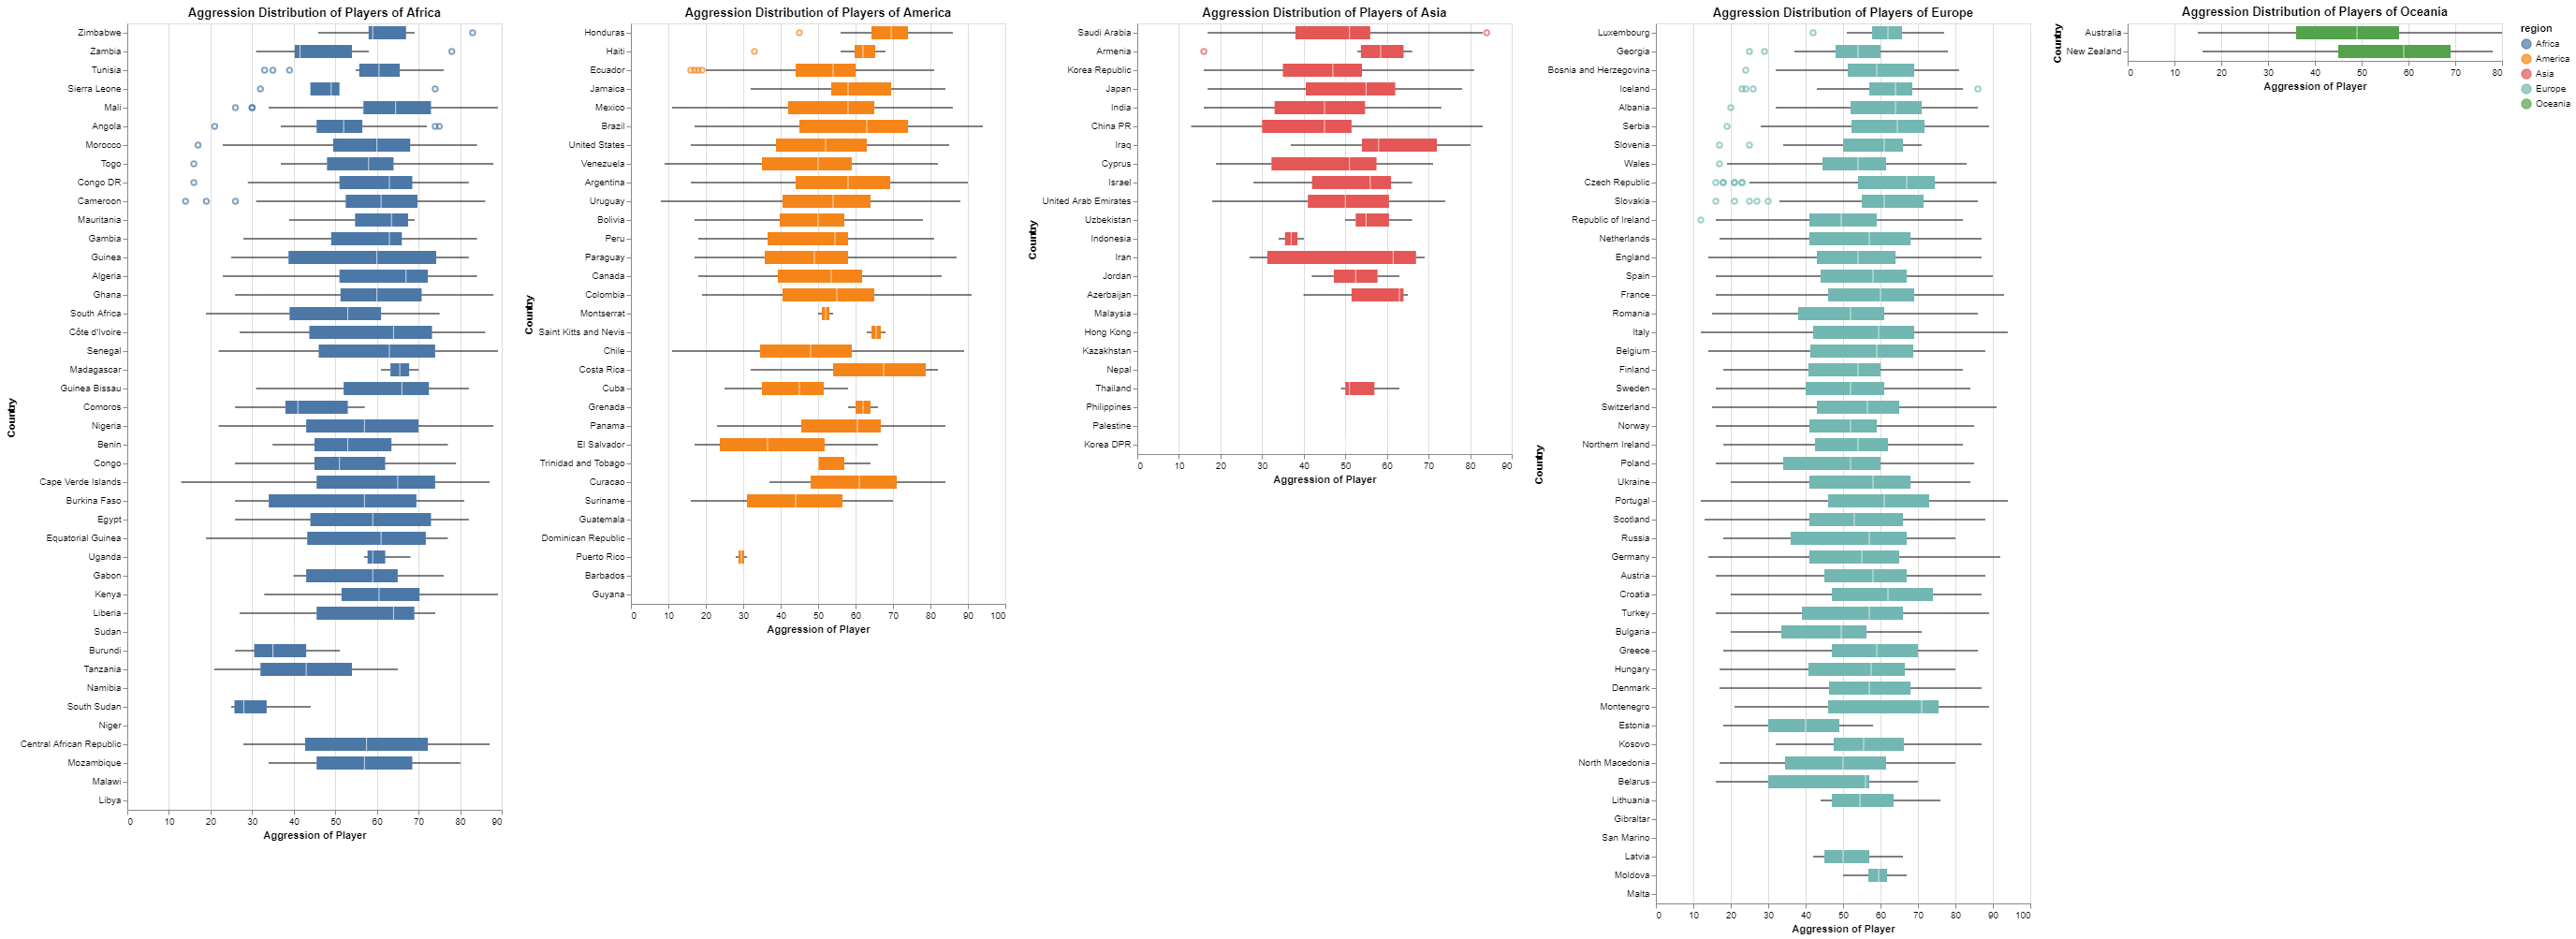

In [60]:
# 1. Find country where players are most aggressive
# Take top 5 countries, sorted by median (desc) (NOTE: NOT sorting properly now)

# create base plot
aggr_base = alt.Chart(fifa_subset).mark_boxplot().encode(
        x = alt.X("aggression", title="Aggression of Player"),
        y = alt.Y("country:N", title="Country", sort=alt.EncodingSortField(field="aggression", order="descending")),
        color = alt.Color("region")
)
# create chart basis to add aggr_base by horizontal concatenation
aggr_chart = alt.hconcat()
regions = sorted(fifa_subset.region.unique().tolist())
# honcat each of the base from different region filtered
for region in regions:
    aggr_chart |= aggr_base.transform_filter(
        alt.FieldEqualPredicate(field='region', equal = region)
    ).properties(
        title=f"Aggression Distribution of Players of {region}"
    )
aggr_chart

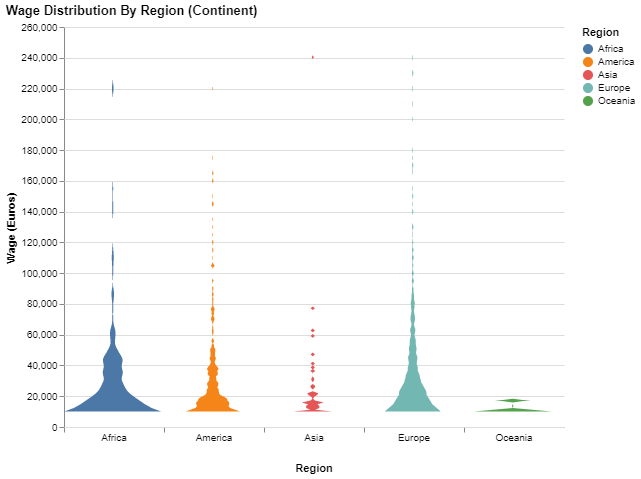

In [80]:
# 2. Discover distribution of wages by continent/country. Include weighted by skill/some attributes. 
# Those that do better would be paying their players more high std, should give pretty spread distributions
# basic_hist = alt.Chart(fifa_subset).mark_bar().encode(
#     x = alt.X("wage", scale=alt.Scale(domainMin=0, domainMax=500_000), bin=alt.Bin(maxbins=50)),
#     y = alt.Y("count(wage)")
# )

# using violet plot could be misleading, since max is 450_000, min is like 500
wage_violin = alt.Chart(fifa_subset).transform_density(
    'wage',
    extent=[10_000, 250_000],
    as_=['wage', 'density'],
    groupby=['region']
).mark_area(orient='horizontal').encode(
    y=alt.Y('wage:Q', title="Wage (Euros)"),
    color=alt.Color('region:N', title="Region"),
    x=alt.X(
        'density:Q',
        stack='center',
        impute=None,
        title=None,
        axis=alt.Axis(labels=False, values=[0], grid=False, ticks=True),
    ),
    column=alt.Column(
        'region:N',
        title="Region",
        header=alt.Header(titleOrient='bottom', labelOrient='bottom', labelPadding=0)
    )
).properties(
    width=100,
    height=400,
    title="Wage Distribution By Region (Continent)"
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)

wage_violin

In [ ]:
# 3. Explore/Compare correlation of sprint_speed & stamina, and shot power & strength (interactive)

# user-picked attributes to visualize
row_names = ["sprint_speed", "stamina", "shot_power", "strength"]
col_names = sorted(row_names)

# visualization of scatter matrix

scatter_matrix_4_attr = alt.Chart(fifa_subset).mark_circle().encode(
    x = alt.X(alt.repeat("column"), type="quantitative"),
    y = alt.Y(alt.repeat("row"), type="quantitative"),
    color = "region:N"
).properties(
    width=150,
    height=150
).repeat(
    row = row_names,
    column = col_names
)

# interactive add by caution, otherwise very laggy

scatter_matrix_4_attr

In [ ]:
# 4.Explore the differences in ball control and dribbling between someone whose 	preferred leg is left vs right.

# check the two different plot, and then decide which to use

# I DO NOT RECOMMEND THIS ONE
bc_dri_diff_plot = alt.Chart(fifa_subset).mark_circle().encode(
    x = alt.X("dribbling"),
    y = alt.Y("ball_control"),
    color = alt.Color("preferred_foot:N"),
    tooltip=["name", "dribbling", "ball_control"]
).properties(
    width = 175,
    height = 175
)

bc_dri_diff_plot

In [ ]:
# I RECOMMEND THIS ONE
bc_dri_facet_plot = alt.Chart(fifa_subset).mark_circle().encode(
    x = alt.X("dribbling"),
    y = alt.Y("ball_control"),
    color = alt.Color("preferred_foot:N"),
    tooltip=["name", "dribbling", "ball_control"]
).properties(
    width = 175,
    height = 175
).facet(
    facet="region",
    columns=2,
    title="Differences in Ball Control and Dribbling by Preferred Foot of Regions"
)
bc_dri_facet_plot

In [ ]:
region_subsets = [fifa_subset[fifa_subset["region"] == region] for region in regions]

In [ ]:
afr = region_subsets[0]

In [ ]:
alt.Chart(afr).mark_bar().encode(
    x = "height",
    y = "count():Q",
    color = "country"
).properties(
    width = 250,
    height = 250,
    title = "Range of Height with Best Average Overall by Country"
).facet(
    facet = 'country',
    columns=5
)

In [ ]:
# base = alt.Chart(fifa_subset).mark_bar().encode(
#     x = "height",
#     y = "count():Q",
#     # color = "country"
# ).properties(
#     width = 250,
#     height = 250,
#     title = "Range of Height with Best Average Overall by Country"
# )
height_chart = alt.hconcat()
for df in region_subsets:
    height_chart |= alt.Chart(df).mark_bar().encode(
    x = "height",
    y = "count():Q",
    color = "country"
).properties(
    width = 250,
    height = 250,
    title = "Range of Height with Best Average Overall by Country"
).facet(
    facet = 'country',
    columns=5
)

In [ ]:
height_chart

In [ ]:
asia_plt = alt.Chart(fifa_subset).mark_bar().encode(
    x = "height",
    y = "count():Q",
    # color = "country"
).properties(
    width = 250,
    height = 250,
    title = "Range of Height with Best Average Overall by Country"
).transform_filter(
    alt.FieldEqualPredicate(field="region", equal="Asia")
)

In [ ]:
height_chart = alt.hconcat()
height_base = alt.Chart(fifa_subset).mark_bar().encode(
    x = "height",
    y = "count():Q",
    # color = "country"
).properties(
    width = 250,
    height = 250,
    title = "Range of Height with Best Average Overall by Country"
)
for region in regions:
    height_chart |= height_base.transform_filter(
        alt.FieldEqualPredicate(field='region', equal=region)).facet(
        facet="country")
height_chart

In [ ]:
# 5. Find the range of height that has the best average overall ranking by country 
# (how to phrase this but just finding the best height for performance) (interactive)
height_base = alt.Chart(fifa_subset).mark_bar().encode(
    x = "height",
    y = "count():Q",
    color = "country"
).properties(
    width = 250,
    height = 250,
    title = "Range of Height with Best Average Overall by Country"
)
# ).facet(
#     facet="region",
#     columns=2
# )
for i, country in enumerate([ASIA, AMERICA, AFRICA, EUROPE, OCEANIA]):
    height_chart |= height_base.transform_filter(
        alt.FieldEqualPredicate(field='country', equal=country)
)

In [ ]:
height_chart